# Data analysis 
(New Replacement)

<br>
Qidu Fu
<br>
3/14/2025
<br>
<br>

**Contents**
- [0 Load data](#0-load-data)
- [1 Data code-switching](#1-detect-code-switching)
    - [1.1 Experiment with regex](#11-experiment-with-regex)
    - [1.2 Experiment with langdetect](#12-experiment-with-the-library-langdetect)
    - [1.3 Experiment with langid](#13-experiment-with-the-library-langid)
    - [1.4 Apply code-switching detection](#14-apply-code-switching-detection)
- [2 Conduct topic modeling](#2-conduct-topic-modeling-to-aggregatecluster-the-topics)
    - [2.1 Use K-Means](#21-use-k-means)
    - [2.2 Use LDA](#22-use-lda)
    - [2.3 Use WordCloud](#23-use-wordcloud-to-visualize-the-clusters)
    - [2.4 Apply topic modeling](#24-apply-topic-modeling-assign-topics)
- [3 Analyze the topic distribution](#3-analyze-the-topic-distribution-exploratory-analysis)

## 0 Load data

In [76]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re

RANDOM_STATE = 100

In [2]:
STACK_DF = pd.read_csv('private/stack_exchange_cleaned.csv')
STACK_DF.head()

,text,topic
0,My translation of Li Bai's 《三五七言》,"translation, poetry"
1,What do these characters on an antique mural p...,"character identification, traditional characte..."
2,Help in translating Li Bai's 《月下独酌·其二》,"translation, poetry"
3,purpose of using 了 with 要不,grammar
4,Why does the character 的 is pronounced differe...,"pronunciation, songs"


In [3]:
STACK_DF.sample(20)

,text,topic
4897,"Can you still use ""Number + MW + 多"" when the N...","grammar, usage, meaning in context, sentence s..."
7323,"How come 将 is a ""future marker"" and a ""passive...","grammar, etymology, old chinese"
1087,The meaning of 鬓边不败牡丹,"translation, meaning, phrase"
7493,What are the Chinese characters for Cantonese ...,cantonese
10260,How should I translate 属地化？,meaning
556,Can anyone please translate the writing and id...,"seal, writing"
11399,"""小王"" 和 ""老王"" how to determine which to use?","usage, culture"
410,A chess cartoon from 1981,translation
11967,Does 上嗨 work as a pun for 上海?,"mandarin, characters, pronunciation"
4608,Translation Gaps On Comic Conversation : 1,"character identification, traditional characters"


In [4]:
STACK_DF.iloc[160, ]

text     Chinese bronze dagger inscriptions
topic      meaning, characters, calligraphy
Name: 160, dtype: object

In [5]:
sample_idx = np.random.choice(STACK_DF.index, 25, replace=False)
STACK_DF.loc[sample_idx, 'text']

11416                                     招财、招福, why cats?
11761    Can you help me to understand the technical te...
1948     Is there a list / database of Chinese mathemat...
7036                            参加 vs 参与 - cānjiā vs cānyu
7119                            Why 你在笑什么？, why not 你笑在什么？
4483     Idiom, common phrase crossword puzzle challenge 2
4161     Are there any online etymological dictionaries...
3360     On a HSK6 test, why is 社会稳定，人民生活水平显著提高，这一切都给人留...
2036     What Chinese language(s) have pronunciation ㄍ丨...
4069     What semantic notions underlie 氵(left radcial ...
9904               How do I say "I've got all his albums"?
10457                          How does 平均 differ from 均匀?
424                     What does 閣 mean in "愛情你比我想的閣較偉大"?
5819     What does 即 mean in ...Google在ICML文中描述的非常清晰，即在...
5630                             -uan pinyin pronunciation
5105                  What does “杀牛” mean in this context?
2729     What's the difference between etymology and gl.

## 1 Detect code-switching
- Using regex to detect code-switching sentences, which produce to consistent results, through human checking (the author) of a 300-records of sample data
- However, using langdetect, the library, does not produce accuracy results; therefore, it is not  used. 
- Similar to langdetect, langid does not produce accurate results; therefore, it is not used. These libraries work well with long text; however, the posts are short. This may explain the reason.
- Apply the regex to detect the CS. 

### 1.1 Experiment with regex

In [6]:
def detect_code_switching_regex(text):
    """
    Detects code-switching between Chinese and English in the provided text.
    
    Parameters:
    text (str): The input text in which code-switching is to be detected.
    
    Returns:
    bool: True if both Chinese characters and English letters are found in the text, 
            False otherwise.
    """
    contains_chinese = bool(re.search(r'[\u4e00-\u9fff]', text))
    contains_english = bool(re.search(r'[a-zA-Z]', text))
    return contains_chinese and contains_english

STACK_DF.loc[sample_idx, 'text'].apply(detect_code_switching_regex)

11416     True
11761    False
1948     False
7036      True
7119      True
4483     False
4161     False
3360      True
2036      True
4069      True
9904     False
10457     True
424       True
5819      True
5630     False
5105      True
2729     False
409       True
9034     False
3239     False
209       True
6109     False
7382     False
834      False
832      False
Name: text, dtype: bool

### 1.2 Experiment with the library langdetect 

In [7]:
# Install langdetect
# !pip3 install langdetect

In [8]:
from langdetect import detect_langs

def detect_code_switching_langdetect(text):
    """
    Detects code-switching between Chinese and English in the provided text using the langdetect library.
    
    Parameters:
    text (str): The input text in which code-switching is to be detected.
    
    Returns:
    bool: True if both Chinese ('zh-cn') and English ('en') are detected in the text, False otherwise.
    """
    try:
        # Detect languages in the text
        langs = detect_langs(text)
        # Extract language codes
        lang_codes = [lang.lang for lang in langs]
        # Check if both Chinese and English are present
        return 'zh-cn' in lang_codes and 'en' in lang_codes
    except Exception as e:
        # Return False if an error occurs (e.g., invalid text format)
        return False

print('abd 我爱你: ', detect_code_switching_langdetect('abd 我爱你'))
STACK_DF.loc[sample_idx, 'text'].apply(detect_code_switching_langdetect)

abd 我爱你:  False


11416    False
11761    False
1948     False
7036     False
7119     False
4483     False
4161     False
3360     False
2036     False
4069     False
9904     False
10457    False
424      False
5819     False
5630     False
5105     False
2729     False
409      False
9034     False
3239     False
209      False
6109     False
7382     False
834      False
832      False
Name: text, dtype: bool

### 1.3 Experiment with the library: langid

In [9]:
# Install library
# !pip3 install langid


In [10]:
import langid

def detect_code_switching_langid(text):
    """
    Detects code-switching between Chinese and English in the provided text using langid.
    
    Parameters:
    text (str): The input text in which code-switching is to be detected.
    
    Returns:
    bool: True if both Chinese ('zh') and English ('en') are detected in the text, False otherwise.
    """
    try:
        # Classify the text to detect language
        detected_languages = langid.classify(text)  # returns a tuple: (language_code, probability)
        detected_lang_code = detected_languages[0]

        # Check if both Chinese and English are detected
        if 'zh' in detected_lang_code and 'en' in detected_lang_code:
            return True
        else:
            return False
    except Exception as e:
        # Return False if an error occurs
        return False

# Apply the function to your DataFrame
STACK_DF.loc[sample_idx, 'text'].apply(detect_code_switching_langid)


11416    False
11761    False
1948     False
7036     False
7119     False
4483     False
4161     False
3360     False
2036     False
4069     False
9904     False
10457    False
424      False
5819     False
5630     False
5105     False
2729     False
409      False
9034     False
3239     False
209      False
6109     False
7382     False
834      False
832      False
Name: text, dtype: bool

### 1.4 Apply code-switching detection

In [11]:
STACK_DF['code_switching'] = STACK_DF['text'].apply(detect_code_switching_regex)
STACK_DF.sample(10)

,text,topic,code_switching
531,What is the difference between 表演 and 演出?,difference,True
4757,What do 開眉粥 and 愁眉飯 mean?,"meaning in context, food, phrase meaning",True
7381,Is it 在桌子上面 or 在桌子的上面?,"grammar, usage",True
10540,Different terms for money throughout history,terminology,False
832,"Word request in Chinese: media transfer, media...","translation, word choice, word requests, cultu...",False
8263,"How to say ""at first sight""?",translation,False
11819,给我站住: Idiom or common meaning,"idioms, phrase",True
530,Who has the final say to what a Chinese charac...,"word, pronunciation, culture",False
4455,Is there a database/application that sorts cha...,"characters, traditional vs simplified, database",False
9041,Question about the usage of 是---的 in Chinese B...,"translation, grammar, vocabulary, literature",True


In [12]:
# Rearrange the columns
STACK_DF = STACK_DF[['text', 'code_switching', 'topic']]
STACK_DF.head()

,text,code_switching,topic
0,My translation of Li Bai's 《三五七言》,True,"translation, poetry"
1,What do these characters on an antique mural p...,False,"character identification, traditional characte..."
2,Help in translating Li Bai's 《月下独酌·其二》,True,"translation, poetry"
3,purpose of using 了 with 要不,True,grammar
4,Why does the character 的 is pronounced differe...,True,"pronunciation, songs"


## 2. Conduct topic modeling to aggregate/cluster the topics
As mentioned in the previous Jupyter Notebook, the original topics were more than 3000 using value counts. Therefore, further aggregation/clustering is needed. 
Based on the K-Means and LDA (and wordcloud), I interpreted and categorized the text into the following six categories/topics/domains (according to LDA):
0) speech (e.g., pronunciation, Pinyin, and other)
1) translation - meaning
2) character - meaning
3) grammar
4) character identification
5) vocabulary (e.g., word choice)


### 2.1 Use K-Means

- Based on KMeans' inertia plot, 6 clusters may be used.

In [22]:
STACK_DF.topic.value_counts()

translation                                                            974
grammar                                                                601
meaning                                                                464
meaning in context                                                     238
word choice                                                            217
                                                                      ... 
terms of address, formal                                                 1
meaning in context, etymology, character identification                  1
idioms, colloquialisms                                                   1
character identification, traditional characters, seal, old chinese      1
translation, style                                                       1
Name: topic, Length: 3502, dtype: int64

In [90]:
# Use Kmeans clustering to find the optimal number of clusters
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

def topic_model_kmeans(vectorizer, n_clusters=5):
    """
    Creates a KMeans clustering model pipeline using a given vectorizer.

    Parameters:
    vectorizer (object): A vectorizer (e.g., TfidfVectorizer) to be used in the pipeline.
    n_clusters (int): The number of clusters to form. Default is 5.

    Returns:
    pipeline: A scikit-learn pipeline with the provided vectorizer and KMeans model.
    """
    kmeans = KMeans(n_clusters=n_clusters)
    # Create a pipeline with the provided vectorizer and KMeans model
    pipeline = make_pipeline(vectorizer, kmeans)
    return pipeline

In [91]:
def plot_inertia(STACK_DF, pipeline, max_clusters=10, random_state=RANDOM_STATE):
    """
    Plots the inertia for different numbers of clusters to help identify the optimal number.

    Parameters:
    STACK_DF (DataFrame): The input DataFrame containing text data in the 'topic' column.
    pipeline (object): A scikit-learn pipeline to be used for fitting the data.
    max_clusters (int): The maximum number of clusters to test. Default is 10.

    Returns:
    None: This function only generates and displays a plot of inertia values.
    """
    inertia = []  # List to store inertia values
    
    # Loop through different numbers of clusters
    for n in range(1, max_clusters + 1):
        # Update the pipeline with the current number of clusters
        pipeline.set_params(kmeans__n_clusters=n, 
                                kmeans__random_state=random_state)
        
        # Fit the pipeline to the data
        pipeline.fit(STACK_DF['topic'])
        
        # Get the KMeans model from the pipeline
        kmeans = pipeline.named_steps['kmeans']
        
        # Append the inertia value for the current model
        inertia.append(kmeans.inertia_)
    
    # Plot inertia to visualize the optimal number of clusters
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_clusters + 1), inertia, marker='o')
    plt.title('KMeans Inertia')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.show()

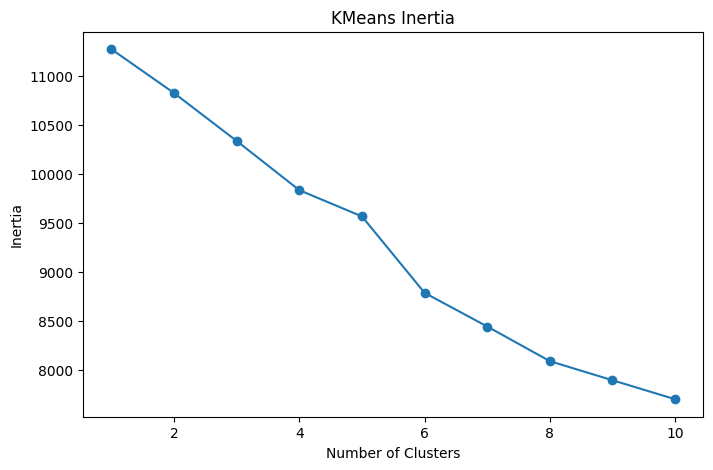

In [92]:
import nltk
# Define a vectorizer
vectorizer = TfidfVectorizer(max_features=10000, stop_words=None, 
                                ngram_range=(1, 2), 
                                tokenizer=nltk.word_tokenize,
                                token_pattern=None)

# Create a pipeline with the vectorizer
kmeans_pipeline = topic_model_kmeans(vectorizer)

# Test with a random sample from your DataFrame
# sample_idx = np.random.choice(STACK_DF.index, 300, replace=False)
plot_inertia(STACK_DF, kmeans_pipeline, max_clusters=10)

In [93]:
# Retrain the model with the optimal number of clusters: 6
kmeans_pipeline.set_params(kmeans__n_clusters=6, 
                            kmeans__random_state=RANDOM_STATE)
kmeans_pipeline.fit(STACK_DF['topic'])

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_features=10000, ngram_range=(1, 2),
                                 token_pattern=None,
                                 tokenizer=<function word_tokenize at 0x30674e9e0>)),
                ('kmeans', KMeans(n_clusters=6, random_state=100))])

In [94]:
def get_top_keywords(pipeline, n_terms=10):
    """
    Extracts the top keywords for each cluster in a KMeans model.
    
    Parameters:
    pipeline (Pipeline): A trained scikit-learn pipeline containing a TfidfVectorizer and KMeans model.
    n_terms (int): The number of top words to extract per cluster.
    
    Returns:
    DataFrame: A DataFrame showing the top keywords for each cluster.
    """
    # Extract the vectorizer and KMeans model from the pipeline
    vectorizer = pipeline.named_steps['tfidfvectorizer']
    kmeans = pipeline.named_steps['kmeans']
    
    # Get feature names (words) from the TF-IDF vectorizer
    feature_names = np.array(vectorizer.get_feature_names_out())
    
    # Identify the top words for each cluster
    top_keywords = []
    for cluster in range(kmeans.n_clusters):
        # Get indices of top TF-IDF words in the cluster centroid
        top_indices = kmeans.cluster_centers_[cluster].argsort()[-n_terms:][::-1]
        top_words = feature_names[top_indices]
        top_keywords.append(top_words)
    
    # Create a DataFrame for better visualization
    topic_df = pd.DataFrame(top_keywords, index=[f"Cluster {i}" for i in range(kmeans.n_clusters)], columns=[f"Word {i+1}" for i in range(n_terms)])
    
    return topic_df

# Run the function to get top words per cluster
kmeans_top_words_df = get_top_keywords(kmeans_pipeline, n_terms=10)
kmeans_top_words_df

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10
Cluster 0,",",word,difference,word choice,choice,vocabulary,usage,etymology,"translation ,",", word"
Cluster 1,meaning,meaning in,context,in,in context,", meaning",",","context ,","translation ,","meaning ,"
Cluster 2,identification,character identification,character,", character","identification ,",",",", seal",seal,"translation ,",translation
Cluster 3,grammar,"grammar ,",",",", grammar","translation ,",", usage",usage,translation,", sentence",", particles"
Cluster 4,characters,"characters ,",",",simplified,simplified characters,traditional,", characters",traditional characters,", simplified",", traditional"
Cluster 5,translation,art,", 了",abbreviations,academic,"academic ,",accent,address,"address ,",adjectives


### 2.2 Use LDA
Based on KMeans, 6 topics may be good. Therefore, 6 topics are used in the LDA model training.

In [95]:
# Use LDA for topic modeling
from sklearn.decomposition import LatentDirichletAllocation

def topic_model_lda(vectorizer, n_topics=5, random_state=RANDOM_STATE):
    """
    Creates an LDA topic modeling pipeline using a given vectorizer.

    Parameters:
    vectorizer (object): A vectorizer (e.g., TfidfVectorizer) to be used in the pipeline.
    n_topics (int): The number of topics to generate. Default is 5.

    Returns:
    pipeline: A scikit-learn pipeline with the provided vectorizer and LDA model.
    """
    lda = LatentDirichletAllocation(n_components=n_topics, 
                                        random_state=random_state)
    # Create a pipeline with the provided vectorizer and LDA model
    pipeline = make_pipeline(vectorizer, lda)
    return pipeline

lda_pipeline = topic_model_lda(vectorizer, n_topics=6)
lda_pipeline

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_features=10000, ngram_range=(1, 2),
                                 token_pattern=None,
                                 tokenizer=<function word_tokenize at 0x30674e9e0>)),
                ('latentdirichletallocation',
                 LatentDirichletAllocation(n_components=6, random_state=100))])

In [100]:
# Evaluate the LDA model
def get_and_display_topics(model, feature_names, n_top_words=10):
    """
    Displays the top words for each topic in an LDA model and returns a DataFrame.

    Parameters:
    model (object): A trained LDA model.
    feature_names (list): A list of words obtained from the vectorizer's get_feature_names() method.
    n_top_words (int): The number of top words to display for each topic. Default is 10.

    Returns:
    DataFrame: A DataFrame containing the top words for each topic.
    """
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        topics.append(top_words)
        message = f"Topic {topic_idx}: " + " ".join(top_words)
        print(message)
    
    # Create a DataFrame with the top words for each topic
    topics_df = pd.DataFrame(topics, columns=[f'Word {i+1}' for i in range(n_top_words)])
    return topics_df

# Fit the LDA model to the data
lda_pipeline.fit(STACK_DF.loc[sample_idx, 'topic'])

# Get the LDA model from the pipeline
lda_model = lda_pipeline.named_steps['latentdirichletallocation']

# Get the feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Get the top words for each topic and display them
lda_top_words_df = get_and_display_topics(lda_model, feature_names, n_top_words=10)

# Display the DataFrame with the top words for each topic
# print(lda_top_words_df)


Topic 0: pronunciation names pinyin , topolect topolect , pinyin pronunciation , , , names , pronunciation
Topic 1: translation meaning difference , , meaning meaning , translation , in in context meaning in
Topic 2: resources , resources terminology , simplified characters songs simplified resources , , ambiguity ambiguity
Topic 3: grammar grammar , , mandarin , grammar translation , mandarin , translation usage , usage
Topic 4: meaning etymology character identification character identification , seal , seal identification , , character
Topic 5: word choice word choice vocabulary characters , word , choice , characters , history


### 2.3 Use WordCloud to visualize the clusters

In [98]:
# Install wordcloud
# !pip3 install wordcloud

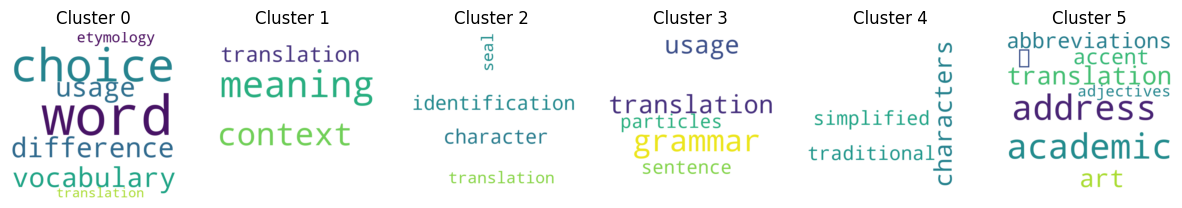

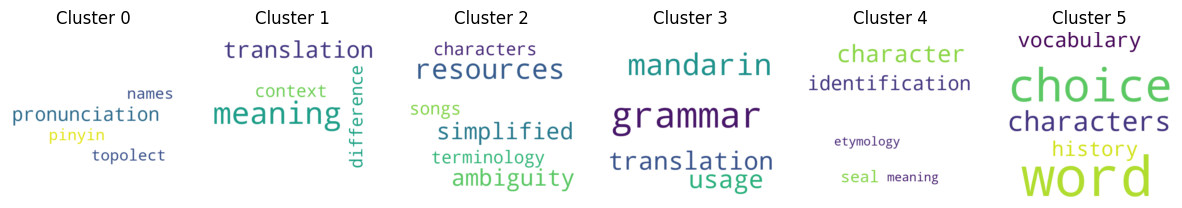

In [101]:
from wordcloud import WordCloud

def plot_wordclouds(top_words_df):
    """
    Generates a word cloud for each cluster.
    
    Parameters:
    top_words_df (DataFrame): DataFrame containing top keywords per cluster.
    
    Returns:
    None: Displays word clouds for each cluster.
    """
    fig, axes = plt.subplots(1, len(top_words_df), figsize=(15, 5))
    
    for i, (cluster, words) in enumerate(top_words_df.iterrows()):
        text = " ".join(words)
        wordcloud = WordCloud(width=500, height=500, background_color="white").generate(text)
        
        axes[i].imshow(wordcloud, interpolation="bilinear")
        axes[i].axis("off")
        axes[i].set_title(f"Cluster {i}")
    
    plt.show()

# Generate and display word clouds
plot_wordclouds(kmeans_top_words_df)
plot_wordclouds(lda_top_words_df)


In [104]:
print('Kmeans top words: ------------------------------------')
kmeans_top_words_df

Kmeans top words: ------------------------------------


,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10
Cluster 0,",",word,difference,word choice,choice,vocabulary,usage,etymology,"translation ,",", word"
Cluster 1,meaning,meaning in,context,in,in context,", meaning",",","context ,","translation ,","meaning ,"
Cluster 2,identification,character identification,character,", character","identification ,",",",", seal",seal,"translation ,",translation
Cluster 3,grammar,"grammar ,",",",", grammar","translation ,",", usage",usage,translation,", sentence",", particles"
Cluster 4,characters,"characters ,",",",simplified,simplified characters,traditional,", characters",traditional characters,", simplified",", traditional"
Cluster 5,translation,art,", 了",abbreviations,academic,"academic ,",accent,address,"address ,",adjectives


In [105]:
print('LDA top words: ------------------------------------')
lda_top_words_df

LDA top words: ------------------------------------


,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10
0,pronunciation,names,pinyin,", topolect",topolect,", pinyin","pronunciation ,",",",", names",", pronunciation"
1,translation,meaning,difference,",",", meaning","meaning ,","translation ,",in,in context,meaning in
2,resources,", resources",terminology,",",simplified characters,songs,simplified,"resources ,",", ambiguity",ambiguity
3,grammar,"grammar ,",",",mandarin,", grammar","translation ,","mandarin ,",translation,usage,", usage"
4,meaning,etymology,character,identification,character identification,",",seal,", seal","identification ,",", character"
5,word,choice,word choice,vocabulary,characters,", word",",","choice ,","characters ,",history


### 2.4 Apply topic modeling: assign topics

In [110]:
# Use the LDA model and assign topics to the entire dataset
# 0) speech (e.g., pronunciation, Pinyin, and other)
# 1) translation - meaning
# 2) character - meaning
# 3) grammar
# 4) character identification
# 5) vocabulary (e.g., word choice)
STACK_DF['topic_idx'] = lda_pipeline.transform(STACK_DF['topic']).argmax(axis=1)
# Map the topic numbers to the topic names
topic_map = {
    0: 'speech',
    1: 'translation',
    2: 'character',
    3: 'grammar',
    4: 'character identification',
    5: 'vocabulary'
}
STACK_DF['topic_lda'] = STACK_DF['topic_idx'].map(topic_map)
STACK_DF.sample(10)

,text,code_switching,topic,topic_lda,topic_idx
412,"俺们那嘎山上有真蘑 - is this really what it says, and i...",True,songs,character,2
3817,"The Taiwanese accent: are pairs ""种，总"", ""四，是"", ...",True,"pronunciation, taiwan, zhuyin fuhao, taiwanese",speech,0
3153,What are the most popular new year greetings i...,False,"cantonese, hong kong, greetings, chinese new year",grammar,3
5137,"How does word order work in ""作业 他 一点 都 没 做 ？""?",True,"grammar, sentence structure, word order",grammar,3
5010,何处横空出世 - meaning,True,"meaning, meaning in context, word",translation,1
5672,Help translating two lines of Zhang Shaolin's ...,True,"translation, pronunciation, topolect, spelling...",speech,0
5267,Need help identifying what is written on the b...,False,translation,translation,1
10745,What abstract things can you 吸收？,True,"grammar, vocabulary",grammar,3
4454,Is there a comprehensive list of separable ver...,True,"resources, separable verbs",character,2
4890,Questions ending with 么: Do 么 and 吗 have the e...,True,"grammar, word choice, particles",grammar,3


## 3 Analyze the topic distribution: exploratory analysis

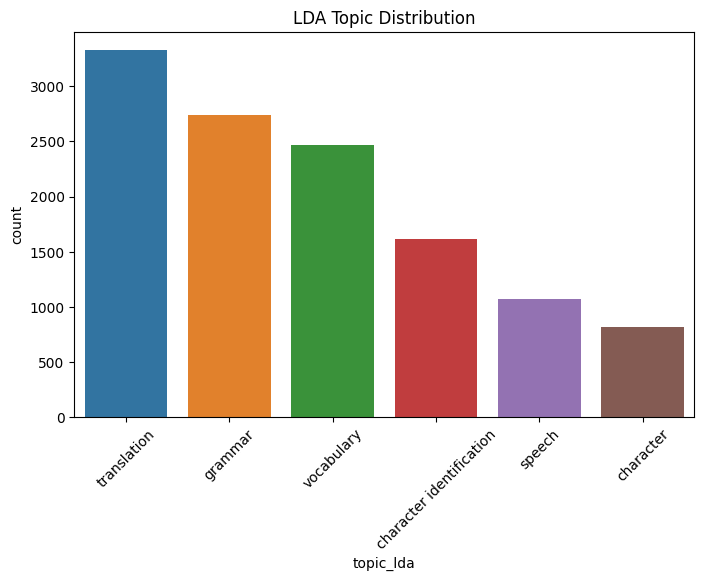

In [115]:
# Display the distribution of topics
def plot_topic_distribution(df, topic_col, title):
    """
    Plots the distribution of topics in a DataFrame.
    
    Parameters:
    df (DataFrame): The input DataFrame containing the topics.
    topic_col (str): The column name containing the topics.
    title (str): The title of the plot.
    
    Returns:
    None: This function displays a plot.
    """
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=topic_col, 
                    order=df[topic_col].value_counts().index)
    # Rotate x-labels for better readability
    plt.xticks(rotation=45)
    plt.title(title)
    plt.show()

plot_topic_distribution(STACK_DF, 'topic_lda', 'LDA Topic Distribution')